In [5]:
import numpy as np
import networkx as nx
from pyvis.network import Network

In [6]:
def replace_nodes_with_colonies(A: np.ndarray, n: int = 10, p: float = 0.5) -> np.ndarray:
	'''
	A: adjacency matrix of the network
	n: number of nodes in each colony
	p: probability of an edge between two nodes in a colony
	'''

	original_graph = nx.from_numpy_array(A)

	colony = nx.gnp_random_graph(n, p)
	while not nx.is_connected(colony):
		colony = nx.gnp_random_graph(n, p)

	colonies = [colony for _ in range(original_graph.number_of_nodes())]
	G = nx.disjoint_union_all(colonies)
	for node in original_graph.nodes():
		neighbors_indices = np.nonzero(A[node])[0]
		G.add_edges_from([(node * n, neighbor_index * n) for neighbor_index in neighbors_indices])

	return nx.to_numpy_array(G)

nx.html


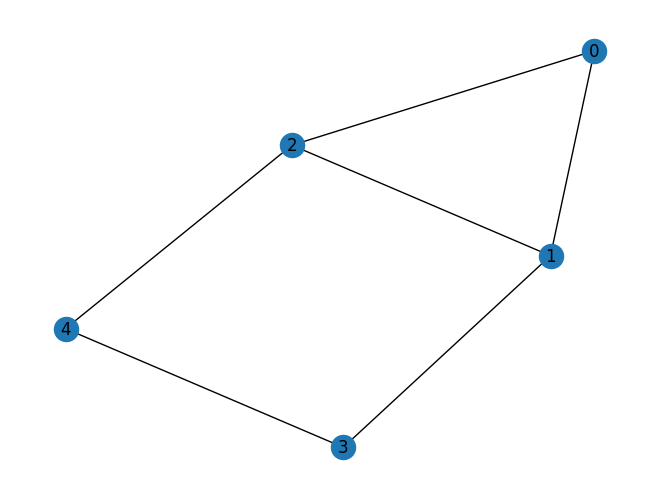

In [7]:
A = np.array([
	[0, 1, 1, 0, 0],
	[1, 0, 1, 1, 0],
	[1, 1, 0, 0, 1],
	[0, 1, 0, 0, 1],
	[0, 0, 1, 1, 0],
])

colonized_graph_np = replace_nodes_with_colonies(A, n=10)
colonized_graph_nx = nx.from_numpy_array(colonized_graph_np)
np.save('data/saved_networks/colonized_house_adj.npy', colonized_graph_np)
np.save('data/saved_networks/colonized_house_inc.npy', np.asarray(nx.linalg.graphmatrix.incidence_matrix(colonized_graph_nx, oriented=True).todense()))

nx.draw(nx.from_numpy_array(A), with_labels=True)

nt = Network("1000px", "1000px")
nt.from_nx(colonized_graph_nx)
nt.show_buttons()
nt.show("nx.html", notebook=False)